In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

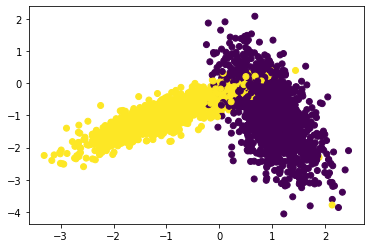

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [ ]:
from sklearn.metrics import accuracy_score
import random

def RandomSearchCV(x, y, classifier, param_range, folds):
    '''
    This function returns the accuracy score on train and cv data for range of hyperparameter values
    '''

    train_scores = []        # Initialize empty list for accuracy on train data
    test_scores = []         # Initialize empty list for accuracy on CV data
    n = len(x)               # size of the input data
    a = n // folds           # divide the input data into k folds

    params = sorted(random.sample(range(param_range[0], param_range[1]), 10))

    for k in params:        # For each value chosen randomly from params
        train_scores_folds = []  # Initialize empty list for accuracy on each fold for train data
        test_scores_folds = []   # Initialize empty list for accuracy on each fold for CV data

        for i in range(folds):  # For each fold
            test_indices = list(range(i*a, (i+1)*a))
            train_indices = list(set(range(0, n)) - set(test_indices))

            x_train = x[train_indices]
            y_train = y[train_indices]
            x_test = x[test_indices]
            y_test = y[test_indices]

            classifier.n_neighbors = k
            classifier.fit(x_train, y_train)   # Fit model on train data

            y_train_pred = classifier.predict(x_train)  # predict on train data
            y_test_pred = classifier.predict(x_test)    # predict on cv data

            train_scores_folds.append(accuracy_score(y_train, y_train_pred))
            test_scores_folds.append(accuracy_score(y_test, y_test_pred))

        train_scores.append(np.mean(train_scores_folds))
        test_scores.append(np.mean(test_scores_folds))

    return train_scores, test_scores, params

## Generalized Function

In [ ]:
import random
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

params_range= {'n_neighbors': [1,10]}

def RandomsearchCV_Generalized(X_train, y_train, classifier, params_range, k_folds=5):
    '''
    This function returns the accuracy score on train and cv data for range of hyperparameter values
    '''

    n_points = len(X_train) // k_folds
    params = {}

    for param in params_range.keys():
        # we are taking 5 random samples here
        if isinstance(params_range[param][0], int) and isinstance(params_range[param][1], int):
            params[param] = random.sample(range(params_range[param][0], params_range[param][1]+1),5)
        elif isinstance(params_range[param][0], float) or isinstance(params_range[param][1], float):
            ls = []
            for i in range(5):
                ls.append(random.uniform(params_range[param][0], params_range[param][1]))
            params[param] = ls
    # print(params)

    train_scores, test_scores = [], []
    for param in params.keys():
        for val in params[param]:
            setattr(classifier, param, val)
            # print(vars(classifier))

            train_fold_scores, test_fold_scores = [], []
            for i in range(k_folds):
                test_indices = np.arange(i*n_points, (i+1)*n_points)
                train_indices = np.array(list(set(np.arange(len(X_train))) - set(test_indices)))
                clf = classifier.fit(X_train[train_indices], y_train[train_indices])
                y_train_pred = clf.predict(X_train)
                y_test_pred = clf.predict(X_test)
                train_fold_scores.append(accuracy_score(y_train, y_train_pred))
                test_fold_scores.append(accuracy_score(y_test, y_test_pred))
                # print(train_fold_scores, test_fold_scores, i)

            train_scores.append(np.mean(train_fold_scores))
            test_scores.append(np.mean(test_fold_scores))
            # print(train_scores, test_scores, val)

    return train_scores, test_scores, params

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
folds = 4

train_scores, cv_scores, params = RandomSearchCV(X_train, y_train, knn, (1, 50), folds)

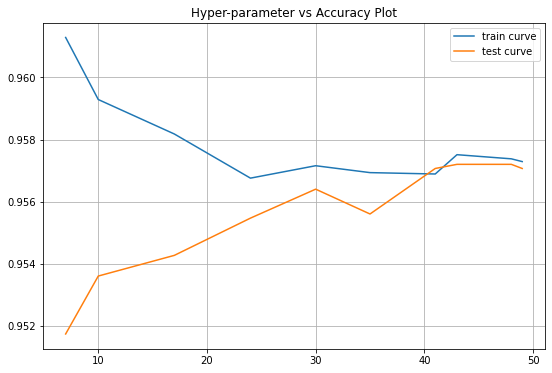

In [ ]:
# Plot accuracy scores on train data and CV data for Hyper-parameter values

plt.figure(figsize = (9,6))
plt.plot(params, train_scores, label = 'train curve')
plt.plot(params, cv_scores, label = 'test curve')
plt.title('Hyper-parameter vs Accuracy Plot')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def plot_decision_boundary(X1, X2, y, clf):
    '''
    This function plots decision boundary for 2D data
    '''

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize = (9,6))
    plt.pcolormesh(xx,yy, Z, cmap = cmap_light)
    plt.scatter(X1, X2, c = y, cmap = cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('2-class Classification (k = %i)' %(clf.n_neighbors))
    plt.show()

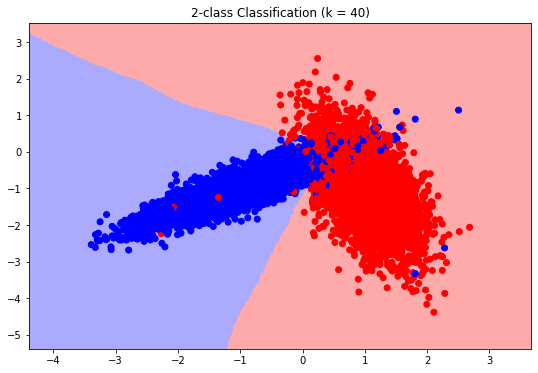

In [ ]:
# Optimal K from graph is 40

from matplotlib.colors import ListedColormap
knn_opt = KNeighborsClassifier(n_neighbors = 40)
knn_opt.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, knn_opt)